In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)

df = pd.read_sql("SELECT * FROM weather_data", engine)
df.head()


,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Chennai,2025-11-12 18:47:43.629680+00:00,25.4,92.0,3.2,49.1,43.9,2.6,124.0
1,2,Bengaluru,2025-11-12 18:47:43.641602+00:00,19.3,93.0,4.2,45.9,44.7,12.8,75.0
2,3,Kolkata,2025-11-12 18:47:43.645636+00:00,17.4,95.0,3.4,135.5,125.3,21.0,54.0
3,4,Hyderabad,2025-11-12 18:47:43.647382+00:00,18.4,79.0,2.3,49.0,46.8,10.6,96.0
4,5,Mumbai,2025-11-12 18:47:43.654991+00:00,25.4,67.0,9.7,44.4,42.1,18.5,78.0


In [2]:
df.describe()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
count,620.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,310.500000,15.650081,81.133333,4.912195,54.532195,49.448943,16.001626,55.021138
std,179.122863,7.473229,14.016688,2.381791,41.507091,36.721050,10.695892,31.532950
min,1.000000,-6.700000,22.000000,1.800000,5.900000,4.400000,0.100000,5.000000
25%,155.750000,11.350000,76.000000,3.300000,22.600000,21.900000,8.400000,28.000000
50%,310.500000,15.500000,84.000000,4.100000,40.600000,38.900000,13.500000,47.000000
75%,465.250000,20.200000,91.000000,5.900000,78.500000,72.200000,22.400000,76.000000
max,620.000000,27.400000,100.000000,14.300000,171.800000,161.100000,43.000000,124.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                620 non-null    int64              
 1   city              620 non-null    object             
 2   timestamp         620 non-null    datetime64[ns, UTC]
 3   temperature       615 non-null    float64            
 4   humidity          615 non-null    float64            
 5   wind_speed        615 non-null    float64            
 6   pm10              615 non-null    float64            
 7   pm2_5             615 non-null    float64            
 8   nitrogen_dioxide  615 non-null    float64            
 9   ozone             615 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1), object(1)
memory usage: 48.6+ KB


In [4]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         5
humidity            5
wind_speed          5
pm10                5
pm2_5               5
nitrogen_dioxide    5
ozone               5
dtype: int64

In [5]:
numeric_cols = ["temperature","humidity","wind_speed","pm10","pm2_5","nitrogen_dioxide","ozone"]

df[numeric_cols] = df.groupby("city")[numeric_cols].transform(
    lambda x: x.interpolate(method="linear", limit_direction="both")
)

In [6]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [7]:
df.nunique()

id                  620
city                 31
timestamp           620
temperature          70
humidity             38
wind_speed           53
pm10                 86
pm2_5                92
nitrogen_dioxide     83
ozone                65
dtype: int64

In [50]:
df_min_pm10 = pd.read_sql("""
SELECT city , MIN(pm10) AS min_pm10
FROM weather_data
GROUP BY city
ORDER BY min_pm10
LIMIT 5
""", engine)


In [51]:
df_max_pm10 = pd.read_sql("""
SELECT city , Max(pm10) AS max_pm10
FROM weather_data
GROUP BY city
ORDER BY max_pm10 DESC
LIMIT 5
""", engine)

In [52]:
df_max_pm2_5 = pd.read_sql("""
SELECT city , MAX(pm2_5) AS max_pm2_5
FROM weather_data
GROUP BY city
ORDER BY max_pm2_5 DESC
LIMIT 5
""", engine)


In [53]:
df_min_pm2_5 = pd.read_sql("""
SELECT city , MIN(pm2_5) AS min_pm2_5
FROM weather_data
GROUP BY city
ORDER BY min_pm2_5
LIMIT 5
""", engine)


In [12]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
id,1.000000,-0.017211,0.003434,-0.001980,0.019415,0.023409,0.040360,-0.038608
temperature,-0.017211,1.000000,0.391734,0.326357,0.049658,0.068899,-0.256481,0.338949
humidity,0.003434,0.391734,1.000000,-0.020573,0.296285,0.312556,-0.107163,-0.029512
wind_speed,-0.001980,0.326357,-0.020573,1.000000,-0.352953,-0.365900,-0.391616,0.225909
pm10,0.019415,0.049658,0.296285,-0.352953,1.000000,0.994247,0.410378,0.033668
pm2_5,0.023409,0.068899,0.312556,-0.365900,0.994247,1.000000,0.452257,-0.012768
nitrogen_dioxide,0.040360,-0.256481,-0.107163,-0.391616,0.410378,0.452257,1.000000,-0.658746
ozone,-0.038608,0.338949,-0.029512,0.225909,0.033668,-0.012768,-0.658746,1.000000


# "Boxplot of all Numeric Columns"

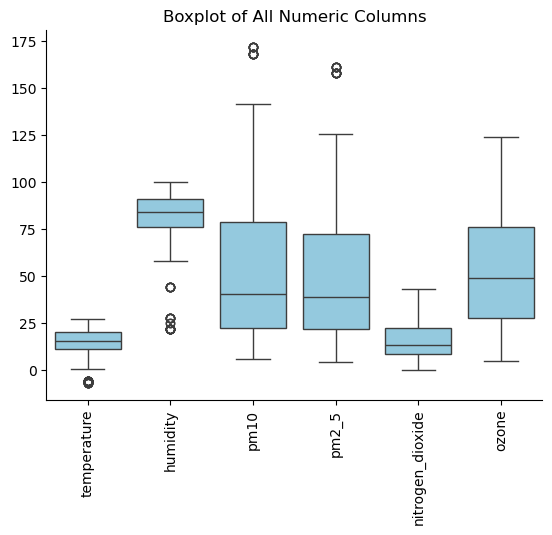

In [22]:
num_columns = ['temperature','humidity','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.boxplot(data=df[num_columns],color='skyblue')
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Columns')
sns.despine()
plt.show()

# "MIN & MAX PM10 AND PM2.5"

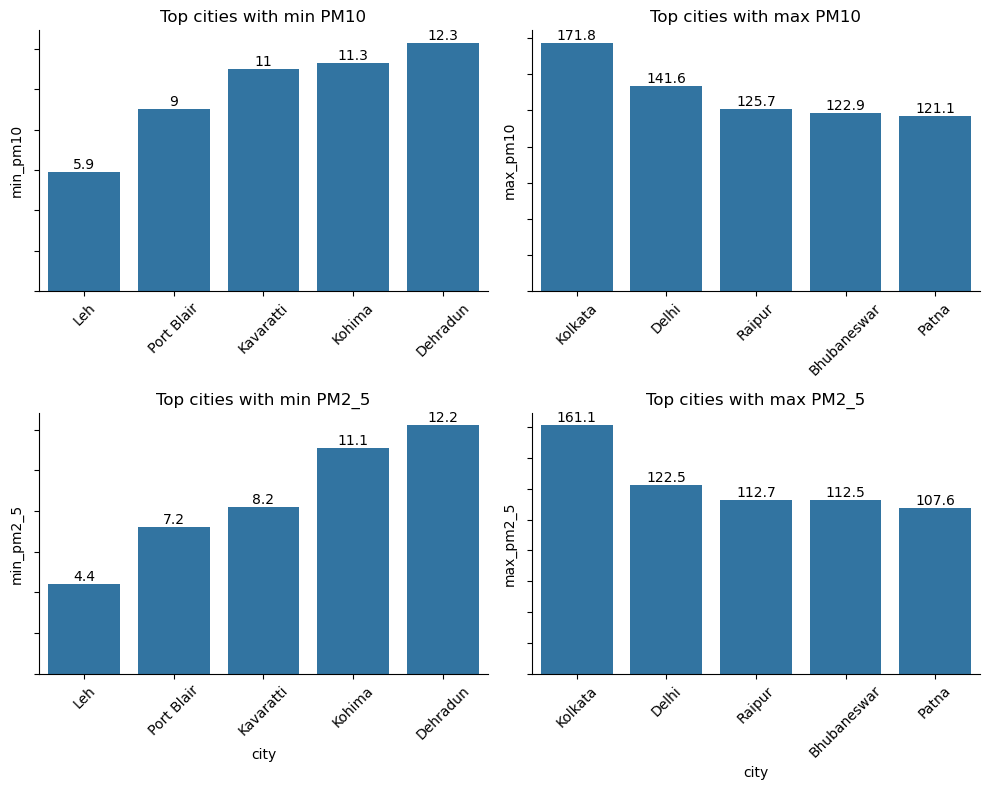

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=df_min_pm10, x='city',y='min_pm10', ax=axes[0,0])
axes[0,0].set_title("Top cities with min PM10")
axes[0,0].bar_label(axes[0,0].containers[0])

sns.barplot(data=df_max_pm10, x='city',y='max_pm10', ax=axes[0,1])
axes[0,1].set_title("Top cities with max PM10")
axes[0,1].bar_label(axes[0,1].containers[0])

sns.barplot(data=df_min_pm2_5, x='city',y='min_pm2_5', ax=axes[1,0])
axes[1,0].set_title("Top cities with min PM2_5")
axes[1,0].bar_label(axes[1,0].containers[0])

sns.barplot(data=df_max_pm2_5, x='city',y='max_pm2_5', ax=axes[1,1])
axes[1,1].set_title("Top cities with max PM2_5")
axes[1,1].bar_label(axes[1,1].containers[0])

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

for ax in axes.flat:
    ax.set_yticklabels([])   # removes numbers

for ax in axes[0]:
    ax.set_xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

In [61]:
pd.read_sql("""
SELECT
    city,
    ROUND(AVG(temperature)::numeric) AS avg_temp
FROM weather_data
GROUP BY city
ORDER BY avg_temp DESC
LIMIT 10""", engine)


,city,avg_temp
0,Port Blair,27.0
1,Thiruvananthapuram,27.0
2,Kavaratti,27.0
3,Puducherry,25.0
4,Mumbai,25.0
5,Chennai,25.0
6,Panaji,24.0
7,Bengaluru,20.0
8,Dispur,20.0
9,Agartala,19.0
